In [1]:
import pandas as pd
import pathlib as Path
import matplotlib.pyplot as plt

In [2]:
# Setting up the Dataframe
file_path = "https://raw.githubusercontent.com/ComfyKoala/diabetes-classification/main/JV/Resources/diabetes_dataset.csv"

dm_pd = pd.read_csv(file_path)

dm_pd.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [3]:
new_column_names = {
    'hbA1c_level': 'A1C',
    'blood_glucose_level': 'RBG',
    'hypertension': 'HTN',
    'race:AfricanAmerican': 'AfricanAmerican',
    'race:Asian': 'Asian',
    'race:Caucasian': 'Caucasian',
    'race:Hispanic': 'Hispanic',
    'race:Other': 'Other'
}

# Rename the columns in the DataFrame
dm_pd.rename(columns=new_column_names, inplace=True)
dm_pd.head()

,year,gender,age,location,AfricanAmerican,Asian,Caucasian,Hispanic,Other,HTN,heart_disease,smoking_history,bmi,A1C,RBG,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [4]:
dm_pd.columns

Index(['year', 'gender', 'age', 'location', 'AfricanAmerican', 'Asian',
       'Caucasian', 'Hispanic', 'Other', 'HTN', 'heart_disease',
       'smoking_history', 'bmi', 'A1C', 'RBG', 'diabetes'],
      dtype='object')

In the cell below, certain columns are being dropped. The purpose is to see if the Model can predict Diabetes using information aside from the dropped columns.

In [5]:
dm_pd.drop(['year', 'smoking_history', 'A1C', 'RBG'], axis=1, inplace=True)
dm_pd.head()

,gender,age,location,AfricanAmerican,Asian,Caucasian,Hispanic,Other,HTN,heart_disease,bmi,diabetes
0,Female,32.0,Alabama,0,0,0,0,1,0,0,27.32,0
1,Female,29.0,Alabama,0,1,0,0,0,0,0,19.95,0
2,Male,18.0,Alabama,0,0,0,0,1,0,0,23.76,0
3,Male,41.0,Alabama,0,0,1,0,0,0,0,27.32,0
4,Female,52.0,Alabama,1,0,0,0,0,0,0,23.75,0


In [6]:
dm_pd.columns

Index(['gender', 'age', 'location', 'AfricanAmerican', 'Asian', 'Caucasian',
       'Hispanic', 'Other', 'HTN', 'heart_disease', 'bmi', 'diabetes'],
      dtype='object')

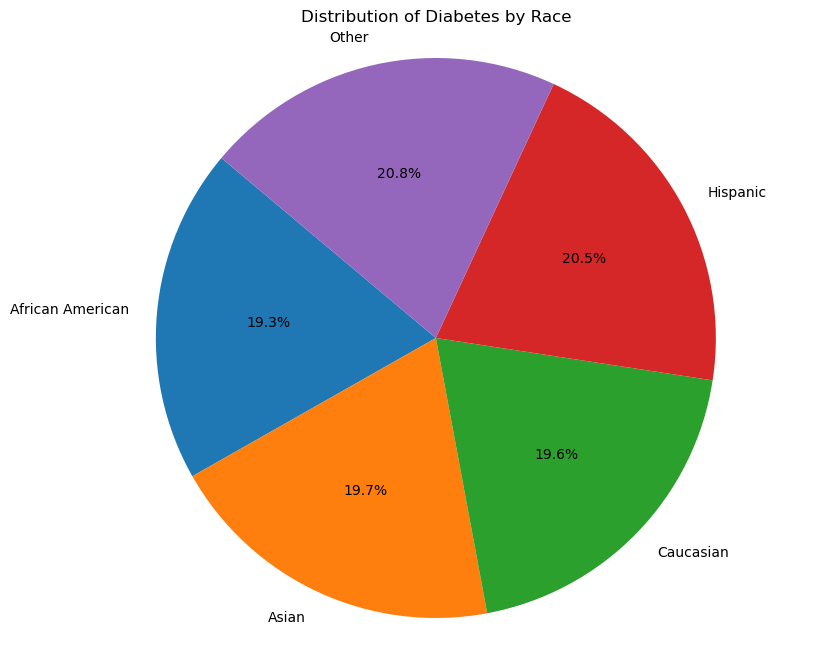

In [10]:
# Filter the data based on the condition (diabetes == 1)
filtered_data = dm_pd[dm_pd['diabetes'] == 1]

# Group the filtered data by race and count the occurrences
race_counts = filtered_data.groupby(['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other']).size()

# Custom labels for each race category
custom_labels = ['African American', 'Asian', 'Caucasian', 'Hispanic', 'Other']

# Create a pie chart with custom labels
plt.figure(figsize=(10, 8))
plt.pie(race_counts, labels=custom_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diabetes by Race')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

In [30]:
dm_counts = dm_pd.groupby(['location', 'diabetes'])['diabetes'].count().reset_index(name='count')
counts_df = dm_counts.set_index(['location', 'diabetes'])['count'].unstack(fill_value=0)
counts_df

diabetes,0,1
location,,
Alabama,1861,175
Alaska,1862,173
Arizona,1846,140
Arkansas,1864,173
California,1825,161
Colorado,1872,163
Connecticut,1855,180
Delaware,1836,200
District of Columbia,1858,178


# Pre-Processing Data

In [7]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
from sklearn.metrics import accuracy_score
import tensorflow as tf
import numpy as np

dm_pd.head()

,gender,age,location,AfricanAmerican,Asian,Caucasian,Hispanic,Other,HTN,heart_disease,bmi,diabetes
0,Female,32.0,Alabama,0,0,0,0,1,0,0,27.32,0
1,Female,29.0,Alabama,0,1,0,0,0,0,0,19.95,0
2,Male,18.0,Alabama,0,0,0,0,1,0,0,23.76,0
3,Male,41.0,Alabama,0,0,1,0,0,0,0,27.32,0
4,Female,52.0,Alabama,1,0,0,0,0,0,0,23.75,0


In [8]:
dm_pd_encoded = pd.get_dummies(dm_pd, columns=['gender', 'location'])
dm_pd_encoded.replace({False: 0, True: 1}, inplace=True)

dm_pd_encoded.head()

,age,AfricanAmerican,Asian,Caucasian,Hispanic,Other,HTN,heart_disease,bmi,diabetes,...,location_Texas,location_United States,location_Utah,location_Vermont,location_Virgin Islands,location_Virginia,location_Washington,location_West Virginia,location_Wisconsin,location_Wyoming
0,32.0,0,0,0,0,1,0,0,27.32,0,...,0,0,0,0,0,0,0,0,0,0
1,29.0,0,1,0,0,0,0,0,19.95,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,0,0,0,0,1,0,0,23.76,0,...,0,0,0,0,0,0,0,0,0,0
3,41.0,0,0,1,0,0,0,0,27.32,0,...,0,0,0,0,0,0,0,0,0,0
4,52.0,1,0,0,0,0,0,0,23.75,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Split the preprocessed data into our features and target arrays.
X = dm_pd_encoded.drop('diabetes', axis=1)
y = dm_pd_encoded['diabetes']

# Split the preprocessed data into training and testing datasets.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, Train and Evaluate Model

In [11]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 67
layer1 = 9
layer2 = 3
layer3 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=layer1, input_dim=number_input_features, activation='relu')
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation='sigmoid'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation='sigmoid'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 9)                   │             612 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 658 (2.57 KB)

 Trainable params: 658 (2.57 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9153 - loss: 0.2796
Epoch 2/100
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9150 - loss: 0.2412
Epoch 3/100
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9167 - loss: 0.2339
Epoch 4/100
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9141 - loss: 0.2369
Epoch 5/100
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9136 - loss: 0.2349
Epoch 6/100
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9156 - loss: 0.2315
Epoch 7/100
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9154 - loss: 0.2307
Epoch 8/100
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9132 - loss: 0.2348
Epoch 9/100
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9153 - loss: 0.2284
Epoch 10/100
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9159 - loss: 0.2275
Epoch 11/100
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9142 - loss: 0.2296
Epoch 12/100
2344/

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

782/782 - 1s - 1ms/step - accuracy: 0.9157 - loss: 0.2350
Loss: 0.23496749997138977, Accuracy: 0.9157199859619141


# Finding Top 20 features

In [15]:

# !pip install scikeras scikit-learn
# !pip install --upgrade scipy scikit-learn scikeras


from scikeras.wrappers import KerasClassifier
from sklearn.inspection import permutation_importance
import numpy as np

# Ensure that nn is defined as your Keras model

# Define the wrapped model (assuming nn is your Keras Sequential model)
wrapped_nn = KerasClassifier(model=nn, epochs=10, batch_size=32, verbose=0)

# Train the wrapped model
wrapped_nn.fit(X_train_scaled, y_train)

# Compute permutation importance
result = permutation_importance(wrapped_nn, X_test_scaled, y_test, n_repeats=8, random_state=10)

# Get feature importances
importances = result.importances_mean

# Ensure X_test_scaled is a DataFrame or convert it
if not isinstance(X_test_scaled, pd.DataFrame):
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Sort the features by importance in ascending order (weakest to strongest)
sorted_indices = np.argsort(importances)

# Get the top 20 weakest features
top_20_weakest_indices = sorted_indices[:20]
top_20_weakest_features = X_test_scaled.columns[top_20_weakest_indices]
top_20_weakest_importances = importances[top_20_weakest_indices]

# Display the weakest features and their importances
for feature, importance in zip(top_20_weakest_features, top_20_weakest_importances):
    print(f"Weakest feature: {feature} with importance {importance}")

Weakest feature: AfricanAmerican with importance -0.00017499999999998073
Weakest feature: Hispanic with importance -0.00016999999999996185
Weakest feature: location_Connecticut with importance -0.0001549999999999746
Weakest feature: Caucasian with importance -0.00013999999999997348
Weakest feature: gender_Male with importance -0.0001349999999999546
Weakest feature: location_Nebraska with importance -0.00011499999999999011
Weakest feature: location_Nevada with importance -9.999999999997511e-05
Weakest feature: location_Alaska with importance -8.999999999997899e-05
Weakest feature: location_California with importance -6.499999999995398e-05
Weakest feature: location_South Carolina with importance -5.499999999995786e-05
Weakest feature: location_Montana with importance -4.999999999996674e-05
Weakest feature: location_Kentucky with importance -4.999999999996674e-05
Weakest feature: HTN with importance -4.4999999999975615e-05
Weakest feature: location_Delaware with importance -3.999999999997

In [16]:
# Get feature importances
importances = result.importances_mean

# Ensure X_test_scaled is a DataFrame or convert it
if not isinstance(X_test_scaled, pd.DataFrame):
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Sort the features by importance in descending order (strongest to weakest)
sorted_indices = np.argsort(importances)[::-1]

# Get the top 20 strongest features
top_20_strongest_indices = sorted_indices[:20]
top_20_strongest_features = X_test_scaled.columns[top_20_strongest_indices]
top_20_strongest_importances = importances[top_20_strongest_indices]

# Display the strongest features and their importances
for feature, importance in zip(top_20_strongest_features, top_20_strongest_importances):
    print(f"Strongest feature: {feature} with importance {importance}")

Strongest feature: bmi with importance 0.00180000000000001
Strongest feature: age with importance 0.000695000000000015
Strongest feature: heart_disease with importance 0.00021500000000002073
Strongest feature: location_New Hampshire with importance 0.00017000000000003124
Strongest feature: location_Rhode Island with importance 0.00013499999999999623
Strongest feature: location_Tennessee with importance 0.0001250000000000001
Strongest feature: location_Virginia with importance 0.00011500000000001787
Strongest feature: location_Iowa with importance 0.00011499999999999011
Strongest feature: location_Florida with importance 0.00010999999999998511
Strongest feature: location_North Carolina with importance 0.00010499999999999399
Strongest feature: location_South Dakota with importance 0.00010000000000000286
Strongest feature: location_Massachusetts with importance 9.000000000000674e-05
Strongest feature: location_Missouri with importance 8.499999999998786e-05
Strongest feature: location_Minn